In [2]:
!pip install jedi

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833 

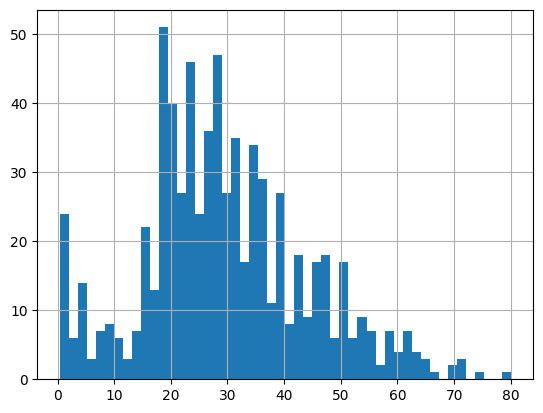

   pclass  sex   age
0       3    1  22.0
1       1    0  38.0
2       3    0  26.0
3       1    0  35.0
4       3    1  35.0
(714, 3)
           pclass         sex         age
count  714.000000  714.000000  714.000000
mean     2.236695    0.634454   29.699118
std      0.838250    0.481921   14.526497
min      1.000000    0.000000    0.420000
25%      1.000000    0.000000   20.125000
50%      2.000000    1.000000   28.000000
75%      3.000000    1.000000   38.000000
max      3.000000    1.000000   80.000000
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB
None
survived
0    424
1    290
Name: count, dtype: int64
Train Result: 

Accuracy score: 0.9098

Classification Report: 
               precision    re

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [4]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
from sklearn import svm
from jedi.api.refactoring import inline

from sklearn.datasets import load_iris, make_moons
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.base import clone
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
#import graphviz
from sklearn import preprocessing


# BAGGING

df = sns.load_dataset('titanic')
print(df.shape)
print(df.head())

#df.dropna(inplace=True)

print(df.head())

print(df['pclass'].unique())

print(df['pclass'].value_counts())

print(df['sex'].value_counts())

df['age'].hist(bins=50)
plt.show()

''' Data Preprocessing '''
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)

X = subset[['pclass', 'sex', 'age']].copy()

le = preprocessing.LabelEncoder()       # Transforma male/ female en unos y ceros

X['sex'] = le.fit_transform(subset['sex'])

print(X.head())
print(X.shape)
print(X.describe())
print(X.info())

y = subset['survived'].copy()
print(y.value_counts())


# Fit Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)

    if train:
        '''
        training process
        '''
        res = clf.predict(X_train)
        print("Train Result: \n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
        print("Confussion Matrix: \n {}\n".format(confusion_matrix(y_train, res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))

    elif train == False:

        res_test = clf.predict(X_test)
        print("Train Result: \n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, res_test)))
        print("Confussion Matrix: \n {}\n".format(confusion_matrix(y_test, res_test)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))


''' Decision Tree '''

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print_score(clf, X_train, X_test, y_train, y_test, train=True)
print('\n *************************************************')
print_score(clf, X_train, X_test, y_train, y_test, train=False)


''' Bagging (oob_score = False) '''

'''
out of bag : Método de medición para la predicción de los errores de bosques aleatorios, arboles de decisión incrementados y otros
modelos de Machine Learning que utilizan agregación bootstrap (bagging)

'''

bag_clf = BaggingClassifier(estimator=clf, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print('\n *************************************************')
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)


'''
Bagging(oob_score=True)
Utilizamos las muestras out of bag (predicción de errores) para estimar la exactitud generalizada
'''


bag_clf = BaggingClassifier(estimator=clf, n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print('\n *************************************************')
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)


print(bag_clf.oob_score_)



'''
---------------------------------------------------------------------------------------------------------------------------------------------------------
Random Forest
*Crea arboles de decisión
*Entrenamiento vía método bagging
*Bagging: muestra de muestras
*Random Forest: Muestra de predicciones m = sqrt(p) para clasificación y m = p/3 para problemas de regresión
*Utiliza árboles no correlacionados

RF
*Muestra tanto para observaciones como variables independientes (características) de los datos de entrenamiento

Bagging
*Muestras solo de observaciones aleatorias
* Arboles de decisión selecciona la mejor caracteristica cuando se separa un nodo
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

rf_clf.fit(X_train, y_train)

print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print('\n *************************************************')
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)


'''
------------------------------------------------------ Grid Search --------------------------------------------------------
'''

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
params_grid = {
    "max_depth": [3, None],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ['gini', 'entropy']
}

grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, verbose=1, scoring='accuracy', iid=False)

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_.get_params())

print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print('\n *************************************************')
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)


'''
------------------------------------------------------Extra Trees -----------------------------------------------------
'''
'''
Parecido a los Bosques Aleatorios, los arboles aleatorios extremos van un paso adelante en la forma en que las separaciones son computadas.
En vez de buscar los umbrales más discriminatorios, los umbrales son obtenidos de manera aleatoria para cada variable independiente candidata, algo que
los árboles de decisión no hacen
'''
xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=100)
xt_clf.fit(X_train, y_train)

print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print('\n *************************************************')
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)


'''  -------------------------------------------------------Boosting   ------------------------------------------------------------------------------
 1 Combina varios aprendices débiles en un solo aprendiz fuerte
 2. Entrena predictores secuenciales

 Similar al aprendizaje humano, aprende de errores pasados al enfocarse en problemas dificiles
 El método es el siguiente.

 a) Ajusta la secuencia de modelos de aprendizaje débiles (ejemplos de modelos que son ligeramente mejores que adivinar de manera aleatoria
    como los árboles de decisión) en versiones modificadas repetidas
 b)  Las predicciones de todos ellos son una combinación de votos mayoritarios ponderados (sumas) para producir la predicción final
 c) Las modificaciones de los datos para iteracion bootstrap consiste en aplicar pesos w1, w2 ..., wn a cada muestra de entrenamiento
 d) Inicialmente esos pesos son 1/N
 e) Para cada iteración los pesos son modificados y el algoritmo de aprendizaje es aplicado a los datos ponderados
 f) El algoritmo aumenta los pesos para las muestras de entrenamiento que predijeron incorrectamente y disminuye el peso a aquellas muestras
    que predijeron correctamente
 g) En las iteraciones, los ejemplos que son dificiles de predecir se incrementan los pesos
 '''

ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print('\n********************************************************')
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)


''' Adaboost with Random Forest '''

ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)

ada_clf.fit(X_train, y_train)


print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print('\n********************************************************')
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)